<a href="https://colab.research.google.com/github/TomasWeinstabl/Entregas/blob/main/AvocadosClasificaci%C3%B3n%20Entrega%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
#Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [101]:
#Importamos CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/avocado.csv',sep=",",encoding="iso-8859-1")

In [102]:
#Comprobamos que el archivo se haya importado correctamente
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [103]:
print(df.dtypes)

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object


In [104]:
#Transformamos la columna Date (que se encuentra en formato Object) a formato datetime (osea fechas y horas)
df['Date'] = pd.to_datetime(df['Date'])

#Creamos una columna nueva llamada Timestamp en formato numérico de enteros tipo Unix
df['Timestamp'] = df['Date'].astype(int) // 10**9

In [105]:
print(df.dtypes)

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
Timestamp                int64
dtype: object


In [106]:
#Definimos las variables para el modelo de clasificación
df_west = df[df['region'] == 'West']
X=df_west[["Timestamp","AveragePrice"]]
y=df_west["type"].replace({"organic":1,"conventional":0})

In [107]:
#Importamos las librerías de clasificación
from sklearn.neighbors import KNeighborsClassifier

In [108]:
#Creamos la instancia del modelo
clf=KNeighborsClassifier(n_neighbors=3)

In [109]:
#Entrenamos el modelo con los datos y la etiqueta
clf.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


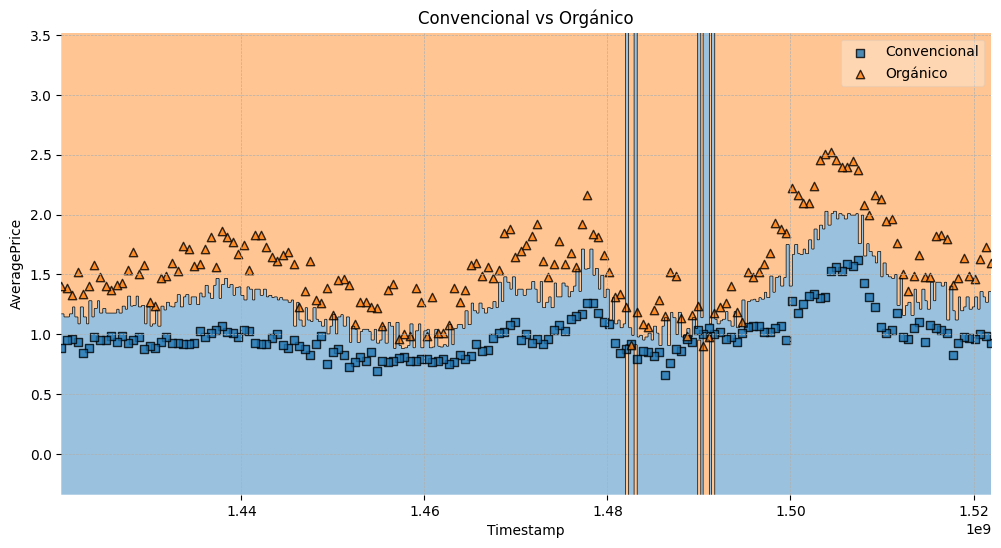

In [110]:
X2=X.values
y2=y.values

plt.figure(figsize=(12, 6))
ax=plot_decision_regions(X2,y2,clf=clf)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.xlabel("Timestamp")
plt.ylabel("AveragePrice")
plt.title("Convencional vs Orgánico")

handles,labels=ax.get_legend_handles_labels()
ax.legend(handles,["Convencional","Orgánico"],framealpha=0.3,scatterpoints=1)
plt.show()

In [111]:
#Probamos algunos puntos para entender si efectivamente estan siendo clasificados como la gráfica
nueva_observacion = np.array([[1480000000, 1]])
prediccion = clf.predict(nueva_observacion)
print(prediccion)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [112]:
nueva_observacion = np.array([[1480000000, 1.5]])
prediccion = clf.predict(nueva_observacion)
print(prediccion)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [113]:
nueva_observacion = np.array([[1440000000, 1]])
prediccion = clf.predict(nueva_observacion)
print(prediccion)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [114]:
nueva_observacion = np.array([[1440000000, 1.5]])
prediccion = clf.predict(nueva_observacion)
print(prediccion)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
